# Predictive Analytics : Hepatitis

Disusun : Aditya Septiawan

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Understanding

#### Data Loading

In [2]:
df = pd.read_csv('dataset/hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## EDA

Perform EDA for variable description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


mengubah Category menggunakan Label Encoding

In [4]:
# Library untuk encoding
from sklearn.preprocessing import LabelEncoder

# Melakukan label encoding pada kolom Category
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])




 menghapus kolom unnamed (urutan nomor pada baris saja)

In [5]:
# Menghapus kolom 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Cek apakah kolom sudah dihapus
print(df.head())

   Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7  


One-Hot Encoding pada sex

In [6]:
# Lakukan One-Hot Encoding pada kolom 'Sex'
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Cek dataframe setelah One-Hot Encoding
print(df.head())


   Category  Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  Sex_m  
0  69.0   True  
1  76.5   True  
2  79.3   True  
3  75.7   True  
4  68.7   True  


Periksa  apakah ada nilai NaN

In [7]:
print(df.isnull().sum())


Category     0
Age          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Sex_m        0
dtype: int64


menggunakan median untuk mengatasi missing value

In [8]:
# Mengisi missing values dengan median dari setiap kolom
columns_with_nan = df.columns[df.isnull().any()]  # Dapatkan kolom yang memiliki NaN

for column in columns_with_nan:
    df[column].fillna(df[column].median(), inplace=True)

# Pastikan kembali apakah NaN sudah hilang
print(df.isnull().sum())


Category    0
Age         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Sex_m       0
dtype: int64


In [9]:
df.describe()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.386992,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,1.052294,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,0.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,4.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


#### EDA to handle missing values and outliers

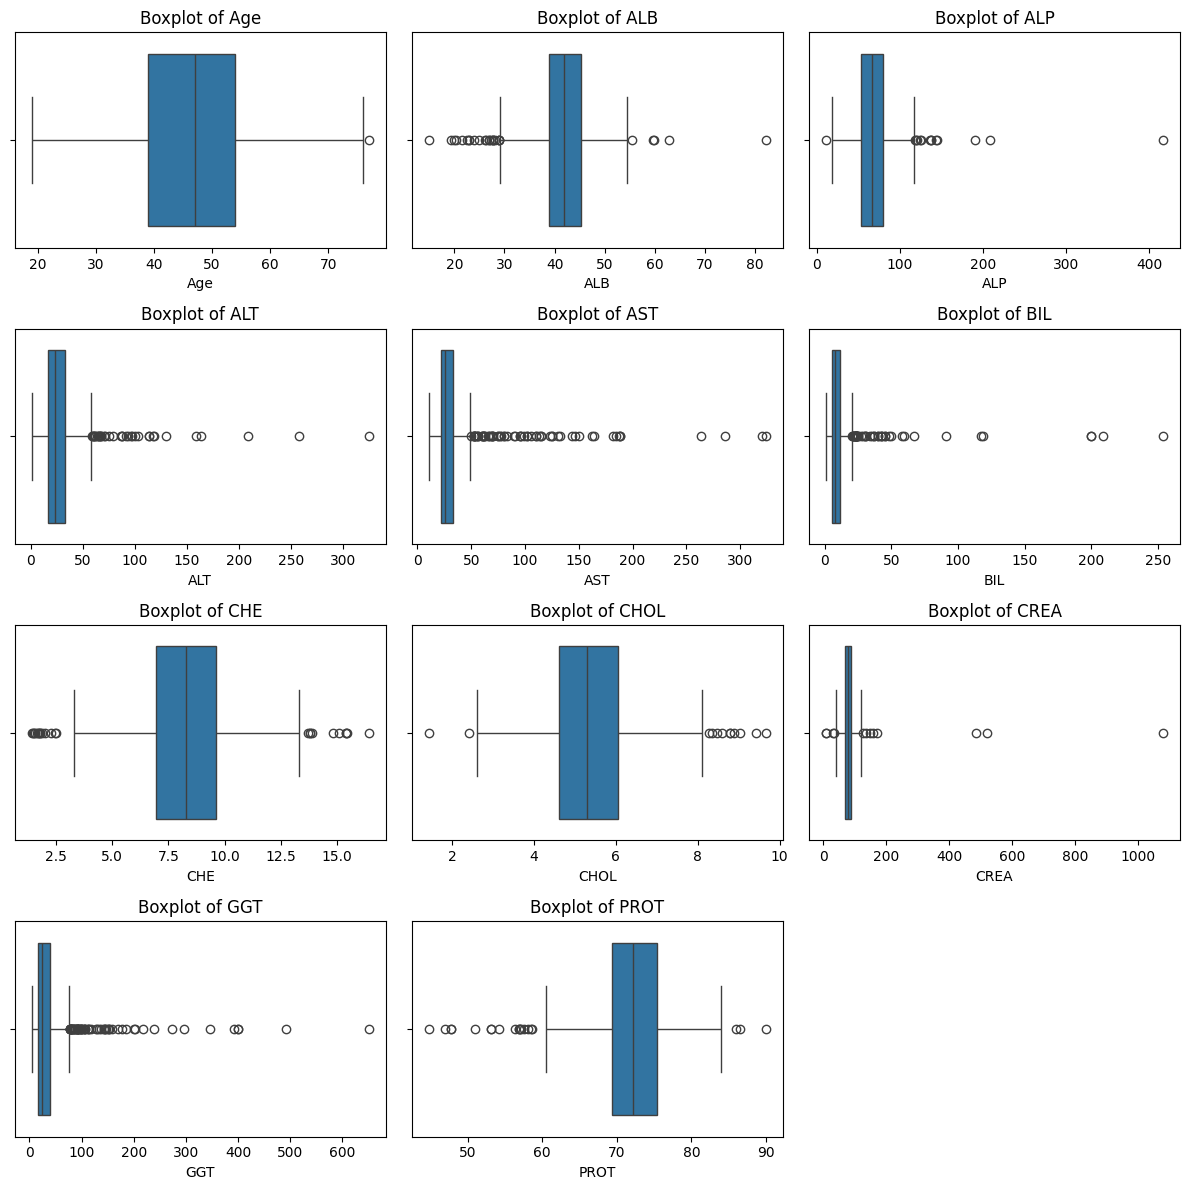

In [10]:
import numpy as np

# Hitung jumlah kolom numerik
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)

# Tentukan jumlah baris dan kolom untuk subplot grid
rows = np.ceil(num_cols / 3).astype(int)  # Menghitung berapa baris yang dibutuhkan

# Membuat plot boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, rows * 3))  # Sesuaikan tinggi berdasarkan jumlah baris

# Iterasi secara langsung melalui kolom numerik dari dataframe
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(rows, 3, i+1)  # Gunakan grid sesuai jumlah baris yang diperlukan
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Agar plot tidak tumpang tindih
plt.show()


menangani outlier

In [11]:
# Hitung Q1 dan Q3 untuk semua kolom numerik
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Hapus outlier dari dataset berdasarkan aturan IQR
df_clean = df[~((df.select_dtypes(include=['float64', 'int64']) < (Q1 - 1.5 * IQR)) | 
                (df.select_dtypes(include=['float64', 'int64']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah outlier dihapus
print(f"Ukuran dataset setelah outlier dihapus: {df_clean.shape}")


Ukuran dataset setelah outlier dihapus: (447, 13)


#### Perform EDA with univariate analysis

Numerical Features

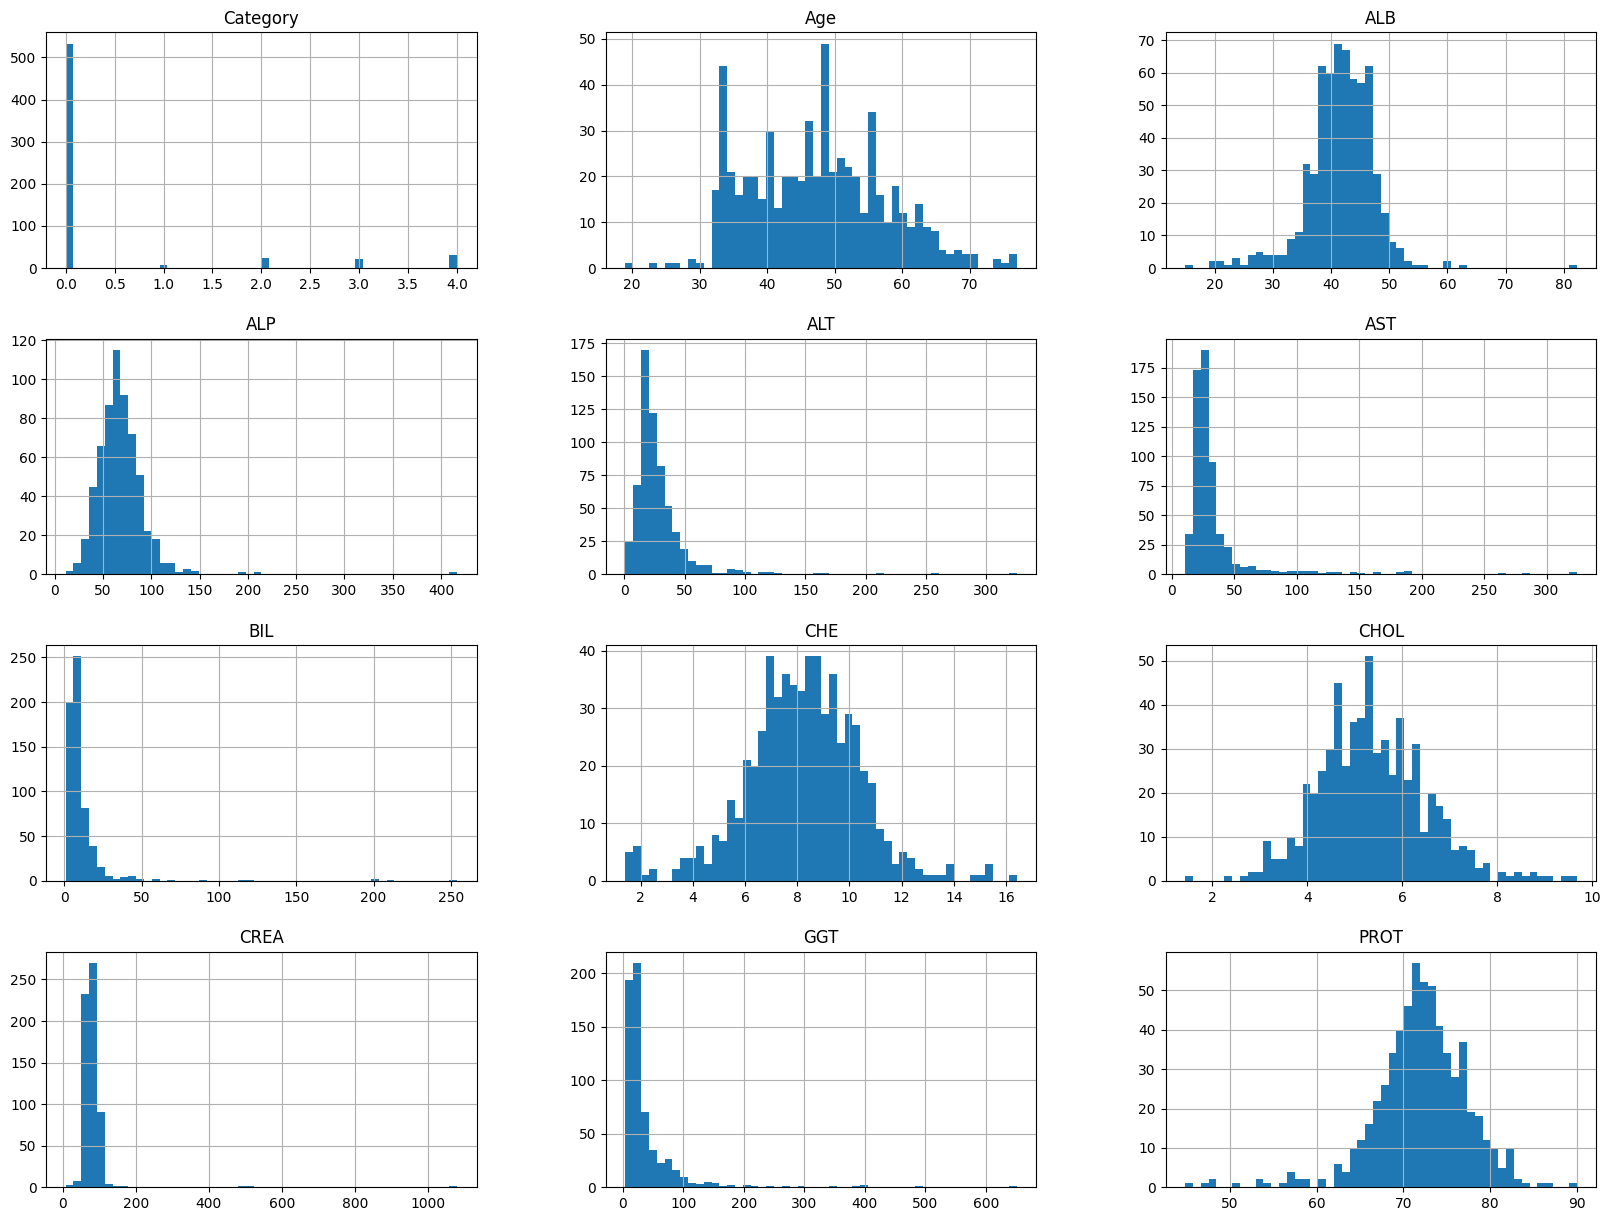

In [12]:
df.hist(bins=50, figsize=(20, 15))
plt.show()


#### Perform EDA with multivariate analysis

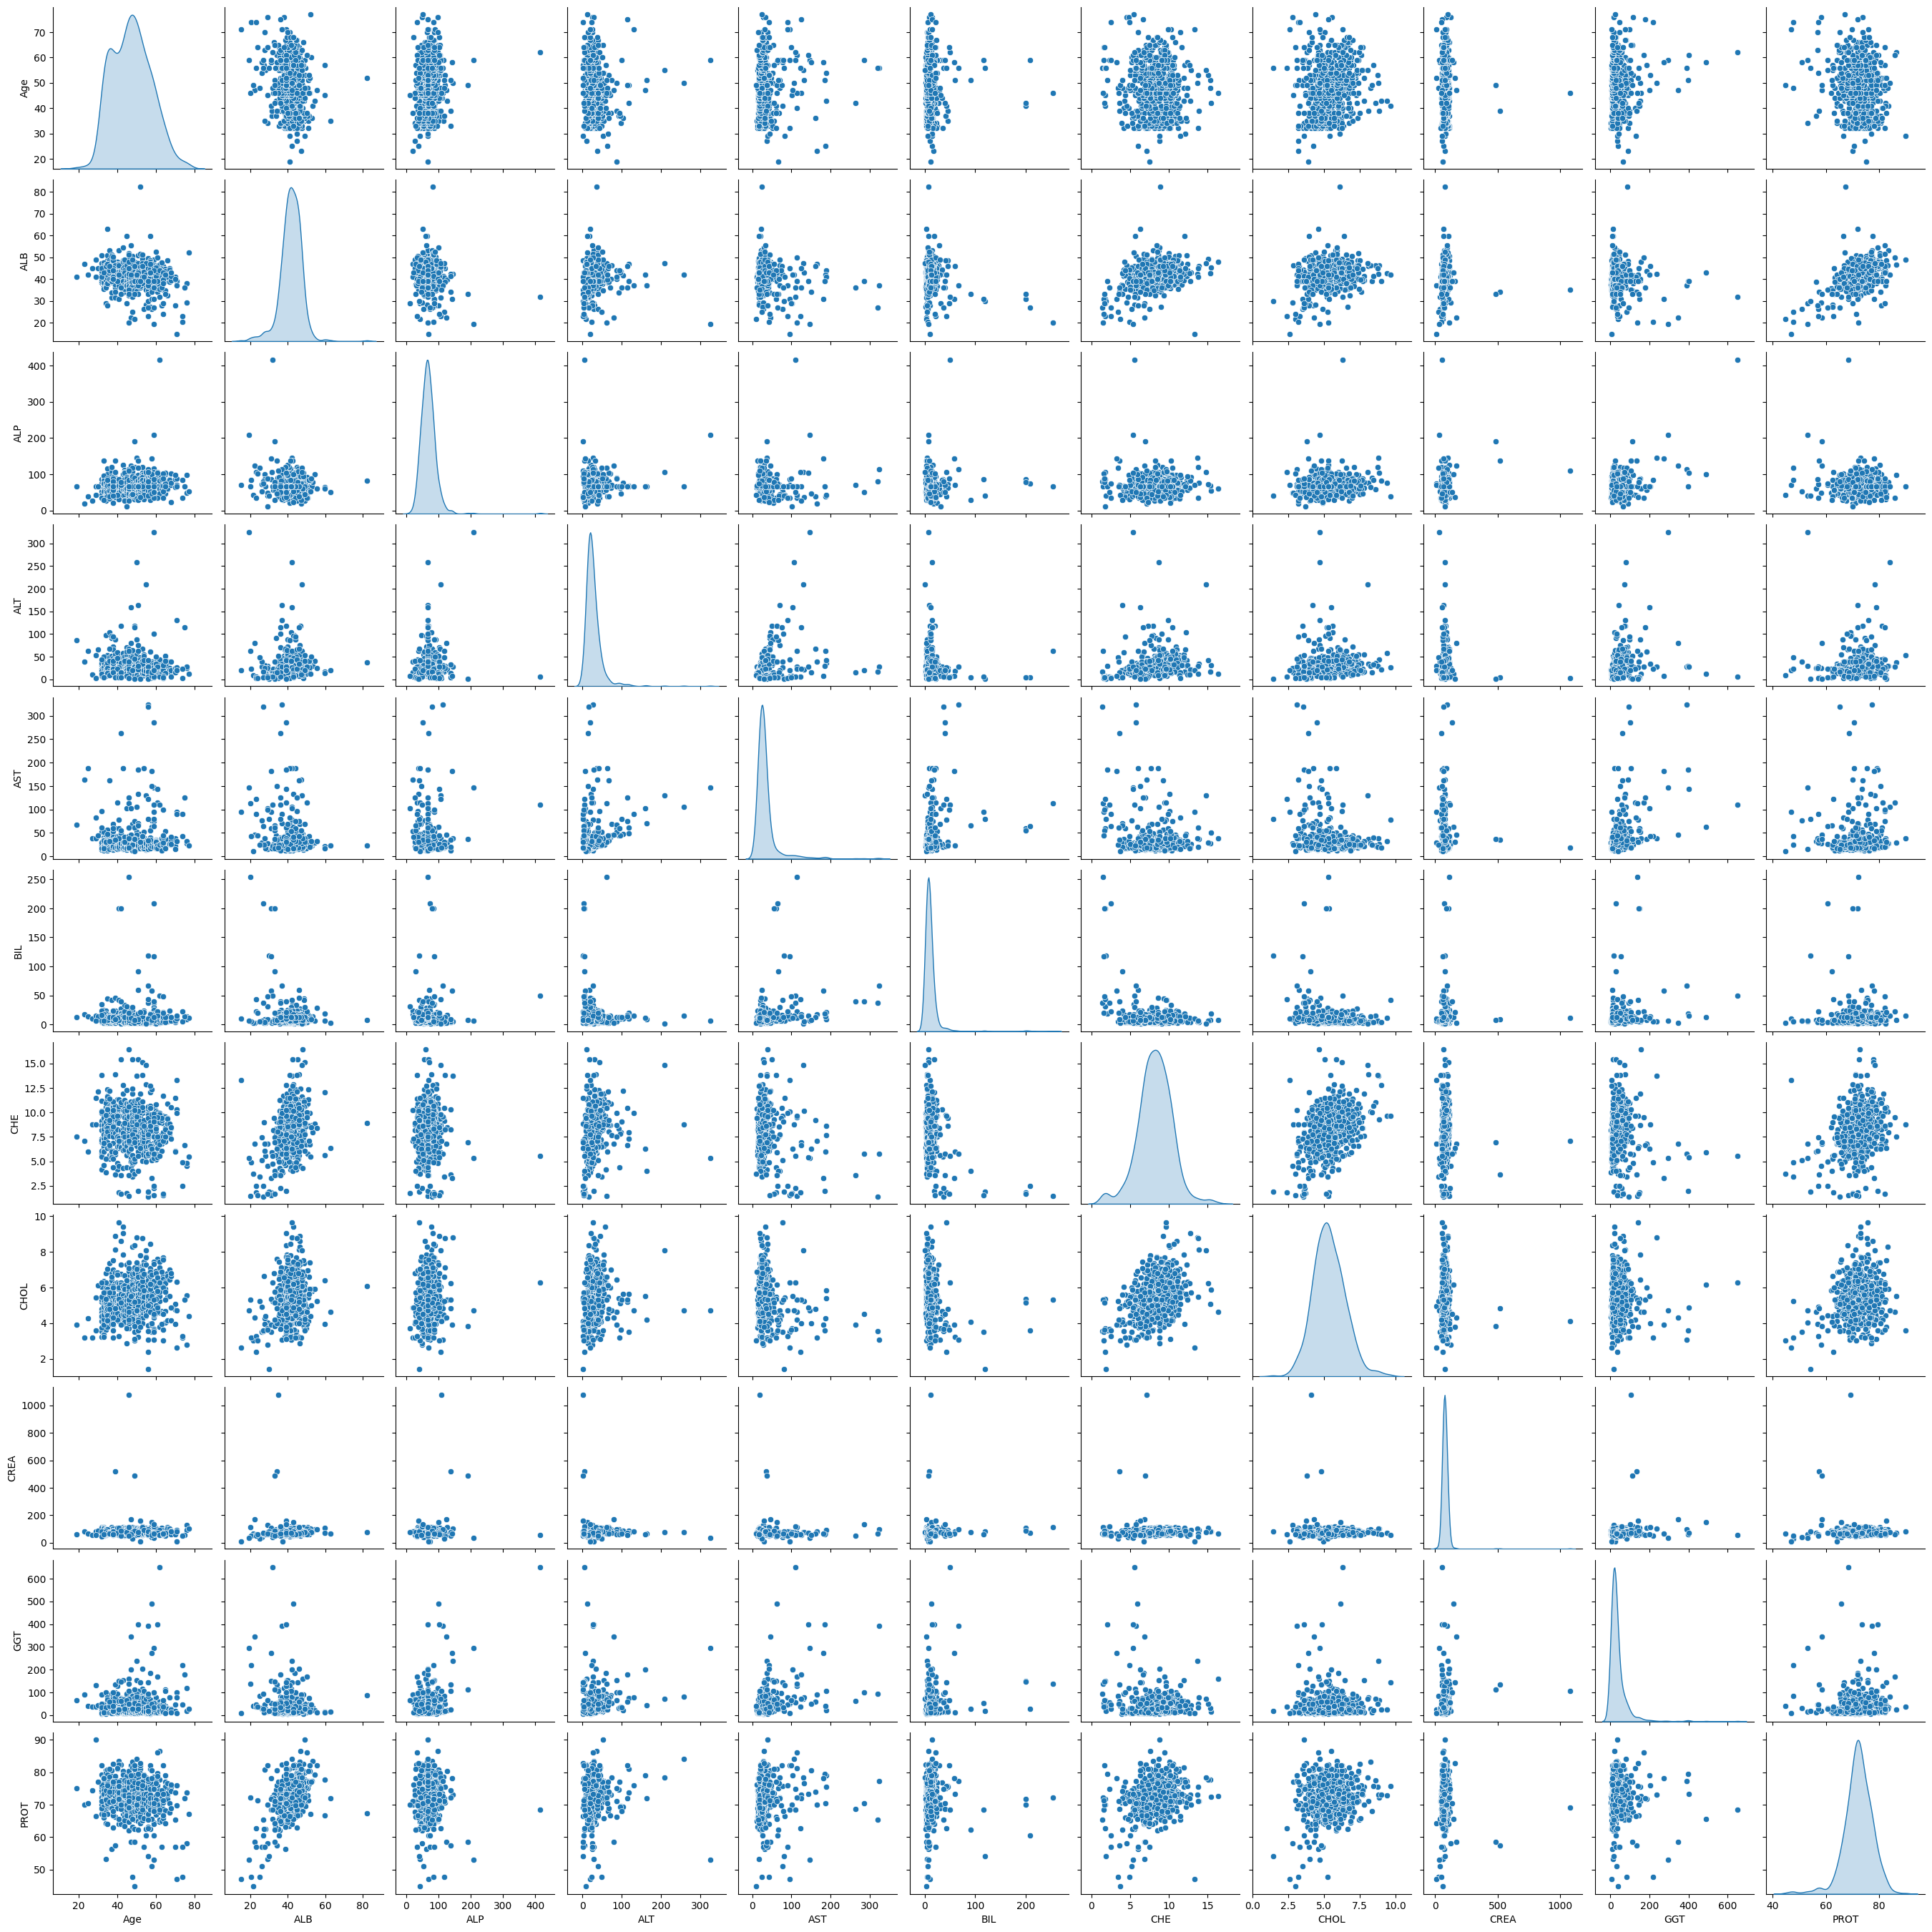

In [13]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde')

plt.show()


#### Correlation Matrix untuk fitur numerik

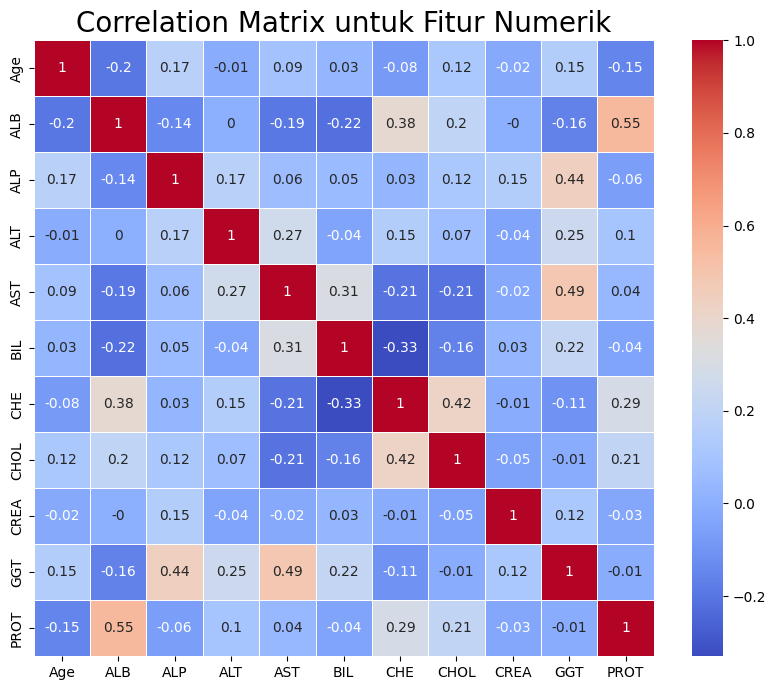

In [14]:
# Memilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Membuat ukuran figure
plt.figure(figsize=(10, 8))

# Menghitung matriks korelasi untuk kolom numerik
correlation_matrix = numerical_df.corr().round(2)

# Membuat heatmap dengan anotasi korelasi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul pada heatmap
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

# Menampilkan plot
plt.show()

## Data Preparation

#### Train-Test-Split

In [15]:
from sklearn.model_selection import train_test_split

# Membagi data
X = df.drop(["Category"], axis=1)  # Drop kolom target
y = df["Category"]  # Kolom target

# Pisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Output jumlah sampel di setiap set
print(f'Total # of samples in the whole dataset: {len(X)}')
print(f'Total # of samples in train dataset: {len(X_train)}')
print(f'Total # of samples in test dataset: {len(X_test)}')

Total # of samples in the whole dataset: 615
Total # of samples in train dataset: 492
Total # of samples in test dataset: 123


#### Normalisasi (Min-Max Scaling)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling

Algorithm  : K-Nearest Neighbor, Support Vector Regression, Random Forest, Boosting

In [17]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score 



# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['accuracy_score'], 
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes'])

#### KNN

In [18]:
# Buat model prediksi dengan KNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Lakukan prediksi dengan model KNN
knn_pred = model_knn.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

#### SVM

In [21]:
# Membuat model SVM dengan kernel linear
model_svm = SVC(kernel='linear')  # Anda bisa mengganti 'linear' dengan 'rbf', 'poly', dsb.

# Latih model SVM dengan data pelatihan
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Lakukan prediksi dengan model SVM
svm_pred = model_svm.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score', 'SVM'] = accuracy_score(y_test, svm_pred)

#### Random Forest

In [23]:
# Buat model prediksi dengan Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Lakukan prediksi dengan model Random Forest
rf_pred = model_rf.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)

#### Naive Bayes

In [25]:
from sklearn.naive_bayes import BernoulliNB
# Buat model prediksi dengan Bernoulli Naive Bayes
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

In [26]:
# Lakukan prediksi dengan model Naive Bayes
nb_pred = model_nb.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

## Evaluasi Model

Diagram Lingkaran dengan Metrik Evaluasi (akurasi, precision, recall, dan F1-score )

C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

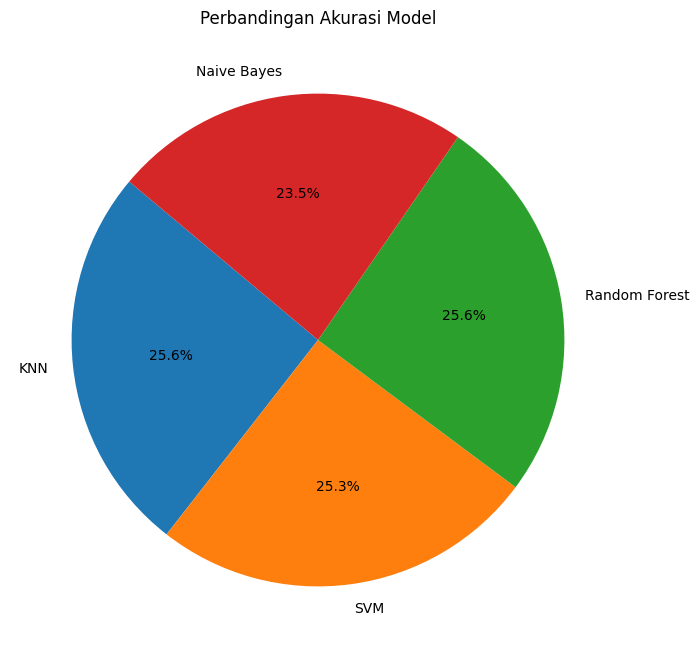

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Hitung metrik untuk setiap model
knn_report = classification_report(y_test, knn_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True) 
nb_report = classification_report(y_test, nb_pred, output_dict=True)    

# Ambil akurasi dan metrik lainnya dari laporan
models_metrics = {
    'KNN': {
        'accuracy': knn_report['accuracy'],
        'precision': knn_report['weighted avg']['precision'],
        'recall': knn_report['weighted avg']['recall'],
        'f1-score': knn_report['weighted avg']['f1-score'],
    },
    'SVM': {
        'accuracy': svm_report['accuracy'],
        'precision': svm_report['weighted avg']['precision'],
        'recall': svm_report['weighted avg']['recall'],
        'f1-score': svm_report['weighted avg']['f1-score'],
    },
    'Random Forest': {
        'accuracy': rf_report['accuracy'],
        'precision': rf_report['weighted avg']['precision'],
        'recall': rf_report['weighted avg']['recall'],
        'f1-score': rf_report['weighted avg']['f1-score'],
    },
    'Naive Bayes': {
        'accuracy': nb_report['accuracy'],
        'precision': nb_report['weighted avg']['precision'],
        'recall': nb_report['weighted avg']['recall'],
        'f1-score': nb_report['weighted avg']['f1-score'],
    }
}

# Data untuk pie chart
labels = list(models_metrics.keys())
accuracy_values = [model['accuracy'] for model in models_metrics.values()] #sesuaikan evaluasi yang diinginkan

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Akurasi Model')
plt.show()


In [44]:
import pandas as pd
from sklearn.metrics import classification_report

# Hitung metrik untuk setiap model
knn_report = classification_report(y_test, knn_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True) 
nb_report = classification_report(y_test, nb_pred, output_dict=True)    

# Ambil akurasi dan metrik lainnya dari laporan
models_metrics = {
    'KNN': {
        'accuracy': knn_report['accuracy'],
        'precision': knn_report['weighted avg']['precision'],
        'recall': knn_report['weighted avg']['recall'],
        'f1-score': knn_report['weighted avg']['f1-score'],
    },
    'SVM': {
        'accuracy': svm_report['accuracy'],
        'precision': svm_report['weighted avg']['precision'],
        'recall': svm_report['weighted avg']['recall'],
        'f1-score': svm_report['weighted avg']['f1-score'],
    },
    'Random Forest': {
        'accuracy': rf_report['accuracy'],
        'precision': rf_report['weighted avg']['precision'],
        'recall': rf_report['weighted avg']['recall'],
        'f1-score': rf_report['weighted avg']['f1-score'],
    },
    'Naive Bayes': {
        'accuracy': nb_report['accuracy'],
        'precision': nb_report['weighted avg']['precision'],
        'recall': nb_report['weighted avg']['recall'],
        'f1-score': nb_report['weighted avg']['f1-score'],
    }
}

# Mengubah model metrics menjadi DataFrame untuk tampilan yang lebih baik
metrics_df = pd.DataFrame(models_metrics).T

# Menampilkan hasil metrik dalam bentuk teks
print("Metrik Model:")
for model, metrics in metrics_df.iterrows():
    print(f"\nModel: {model}")
    print(f"Akurasi: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1-Score: {metrics['f1-score']:.2f}")


Metrik Model:

Model: KNN
Akurasi: 0.90
Precision: 0.88
Recall: 0.90
F1-Score: 0.89

Model: SVM
Akurasi: 0.89
Precision: 0.89
Recall: 0.89
F1-Score: 0.89

Model: Random Forest
Akurasi: 0.90
Precision: 0.86
Recall: 0.90
F1-Score: 0.88

Model: Naive Bayes
Akurasi: 0.83
Precision: 0.69
Recall: 0.83
F1-Score: 0.75


C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471